In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from lifting_line_singular import lifting_line_model_singular
from lifting_line_general import lifting_line_model

# Singular rotor with airfoil polars

Initializing
Setting up blade geometry
Constructing blade number 0
Constructing blade number 1
Constructing blade number 2
Setting up wake induction matrices
Evaluating the effect of the vorticity from blade 0 on blade 0
Evaluating the effect of the vorticity from blade 1 on blade 0
Evaluating the effect of the vorticity from blade 2 on blade 0
Initializing
Setting up blade geometry
Constructing blade number 0
Constructing blade number 1
Constructing blade number 2
Setting up wake induction matrices
Evaluating the effect of the vorticity from blade 0 on blade 0
Evaluating the effect of the vorticity from blade 1 on blade 0
Evaluating the effect of the vorticity from blade 2 on blade 0
Initializing
Setting up blade geometry
Constructing blade number 0
Constructing blade number 1
Constructing blade number 2
Setting up wake induction matrices
Evaluating the effect of the vorticity from blade 0 on blade 0
Evaluating the effect of the vorticity from blade 1 on blade 0
Evaluating the effect 

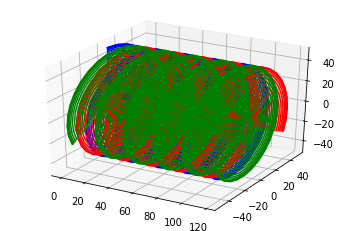

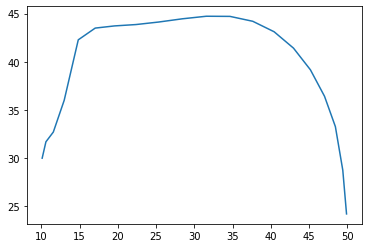

In [36]:
#turbine parameters
R = 50
N_blades = 3
mu_start = 0.2
mu_end = 1
U_0 = 10

N_blade_sec = 20       #number of blade sections
N_wake_sec_rot = 30    #number of wake sections per rotation of the rotor
N_rot = 5              #the number of rotations of the rotor NOTE needs to be integer
a_w = 0.25             #the assumed wake convection induction factor U_wake = U_0*(1-a_w)
TSR = 10
TSR_8 = 8
TSR_6 = 6

airfoil = 'DU_polar.txt' #DU_polar.txt or ARA_polar.txt

mu_vec = np.array([0.2,1.0])   #vector where chord and twist are known. NOTE beginpoint needs to be mu_start and end point mu_end
#chord_vec = np.array([2.452,0.50])  #chord values at above locations in m
#twist_vec = np.array([4.044,-5.22]) #twist values at above locations in degrees
chord_vec_8 = np.array([3.726266186,0.7697521700000003]) 
twist_vec_8 = np.array([7.719046267376299,-4.7470321246237])

chord_vec = np.array([2.454897522,0.5013454500000001])
twist_vec = np.array([5.069728502187389,-5.2134756578126105])

# not given by Olaf:

#twist_vec_8 = np.array([7.48,-2.6])
#chord_vec_8 = np.array([3.74,1.1])

#chord_vec = np.array([2.38,0.7]) # TSR = 10
#twist_vec = np.array([3.72,-3]) # TSR = 10

twist_vec_6 = np.array([9.2,-2])
chord_vec_6 = np.array([3.4,1])

# more accurate:

#twist_vec_8 = np.array([7.48,-2.6])
#chord_vec_8 = np.array([3.74,1.1])

#chord_vec = np.array([2.38,0.7]) # TSR = 10
#twist_vec = np.array([4.54,-3.3]) # TSR = 10

spacing = 'cosine'  #spacing method to use, choose from 'cosine' or 'uniform'

#intialize the class
L = lifting_line_model_singular(R, N_blades, mu_start, mu_end, mu_vec, chord_vec, twist_vec, U_0, TSR, N_blade_sec, N_wake_sec_rot, N_rot, a_w, airfoil, spacing = spacing)
#change an attribute of the class, in this case the update weight, if you're happy with standard value, this line can be skipped
L.weight_step = 0.05
#L.print_progress = False
#commit all the inputs
L.commit_parameters()

L_8 = lifting_line_model_singular(R, N_blades, mu_start, mu_end, mu_vec, chord_vec_8, twist_vec_8, U_0, TSR_8, N_blade_sec, N_wake_sec_rot, N_rot, a_w, airfoil, spacing = spacing)
#change an attribute of the class, in this case the update weight, if you're happy with standard value, this line can be skipped
L_8.weight_step = 0.05
#L.print_progress = False
#commit all the inputs
L_8.commit_parameters()

L_6 = lifting_line_model_singular(R, N_blades, mu_start, mu_end, mu_vec, chord_vec_6, twist_vec_6, U_0, TSR_6, N_blade_sec, N_wake_sec_rot, N_rot, a_w, airfoil, spacing = spacing)
#change an attribute of the class, in this case the update weight, if you're happy with standard value, this line can be skipped
L_6.weight_step = 0.05
#L.print_progress = False
#commit all the inputs
L_6.commit_parameters()

#L_6 = lifting_line_model_singular(R, N_blades, mu_start, mu_end, mu_vec, chord_vec_6, twist_vec_6, U_0, TSR_6, N_blade_sec, N_wake_sec_rot, N_rot, a_w, airfoil, spacing = spacing)
#change an attribute of the class, in this case the update weight, if you're happy with standard value, this line can be skipped
#L_6.weight_step = 0.05
#L.print_progress = False
#commit all the inputs
#L_6.commit_parameters()

#plot the wake of the rotor
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['b','r','g']

for j in range(N_blades):
    ax.plot(L.blades[j].x_cp,L.blades[j].y_cp,L.blades[j].z_cp)
    for i in range(N_blade_sec+1):
        ax.plot(L.blades[j].x_wake[i,:],L.blades[j].y_wake[i,:],L.blades[j].z_wake[i,:], colors[j])

L.solve_system()

L_8.solve_system()

L_6.solve_system()

print(L.blades[0].alpha)

plt.figure()
plt.plot(L.blades[0].R_cent,L.blades[0].gamma_bound)

# Singular rotor with impermeability boundary conditions

In [31]:
L.print_progress= False
L.solve_system_imper()

L_8.print_progress= False
L_8.solve_system_imper()

#L_6.print_progress= False
#L_6.solve_system_imper()

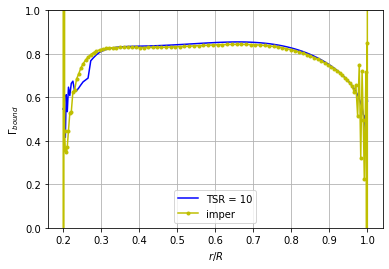

In [35]:
plt.figure()
#plt.plot(L_6.blades[0].R_cent/R,L_6.blades[0].gamma_bound/(U_0**2 *np.pi)*(N_blades*U_0*TSR_6/R), 'r', label ='TSR = 6')
#plt.plot(L_8.blades[0].R_cent/R,L_8.blades[0].gamma_bound/(U_0**2 *np.pi)*(N_blades*U_0*TSR_8/R), 'g', label ='TSR = 8')
plt.plot(L.blades[0].R_cent/R,L.blades[0].gamma_bound/(U_0**2 *np.pi)*(N_blades*U_0*TSR/R), 'b', label ='TSR = 10')
#plt.plot(L_8.blades[0].R_cent/R,L_8.blades[0].gamma_bound_imper/(U_0**2 *np.pi)*(N_blades*U_0*TSR_8/R), '.-r', label ='TSR = 8')
plt.plot(L.blades[0].R_cent/R,L.blades[0].gamma_bound_imper/(U_0**2 *np.pi)*(N_blades*U_0*TSR/R), '.-y', label ='imper')
plt.grid(True)
plt.xlabel('$r/R$')
plt.ylabel('$\Gamma_{bound}$')
plt.savefig('Figures_Turbine/Circulation_imper.eps')
plt.ylim(bottom=0)
plt.ylim(top=1.0)
plt.legend()

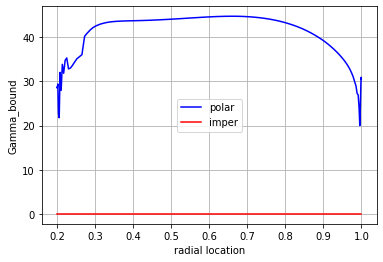

In [23]:
plt.figure()
plt.plot(L.blades[0].R_cent/R,L.blades[0].gamma_bound,'b', label ='polar')
plt.plot(L.blades[0].R_cent/R,L.blades[0].gamma_bound_imper,'r', label = 'imper')
plt.grid(True)
plt.xlabel('radial location')
plt.ylabel('Gamma_bound')
plt.legend()

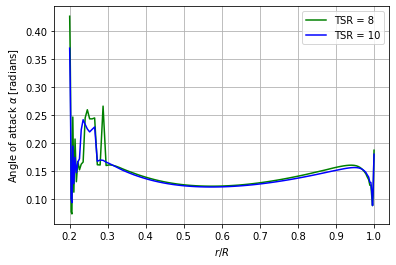

In [24]:
# Plotting the radial distribution of angle of attack

plt.figure()
#plt.plot(L_6.blades[0].R_cent/R,L_6.blades[0].alpha/180*np.pi, 'r', label ='TSR = 6')
plt.plot(L_8.blades[0].R_cent/R,L_8.blades[0].alpha/180*np.pi, 'g', label ='TSR = 8')
plt.plot(L.blades[0].R_cent/R,L.blades[0].alpha/180*np.pi, 'b', label ='TSR = 10')
plt.grid(True)
plt.xlabel('$r/R$')
plt.ylabel(r'Angle of attack $\alpha$ [radians]')
plt.savefig('Figures_Turbine/AoA.eps')
plt.legend()

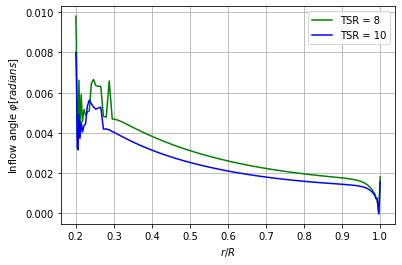

In [25]:
# Plotting the radial distribution of angle of attack

plt.figure()
#plt.plot(L_6.blades[0].R_cent/R,L_6.blades[0].inflowangle/180*np.pi, 'r', label ='TSR = 6')
plt.plot(L_8.blades[0].R_cent/R,L_8.blades[0].inflowangle/180*np.pi, 'g', label ='TSR = 8')
plt.plot(L.blades[0].R_cent/R,L.blades[0].inflowangle/180*np.pi, 'b', label ='TSR = 10')
plt.grid(True)
plt.xlabel('$r/R$')
plt.ylabel(r'Inflow angle $\varphi [radians]$')
plt.savefig('Figures_Turbine/Varphi.eps')
plt.legend()

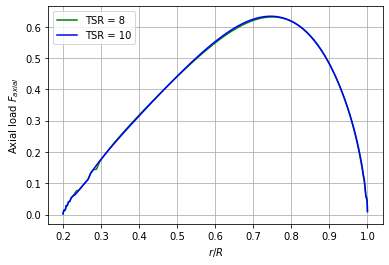

In [26]:
# Plotting the radial distribution of axial load

rho = 1.225

plt.figure()
#plt.plot(L_6.blades[0].R_cent/R,L_6.blades[0].F_T/(0.5*rho*U_0**2*R), 'r', label ='TSR = 6')
plt.plot(L_8.blades[0].R_cent/R,L_8.blades[0].F_T/(0.5*rho*U_0**2*R), 'g', label ='TSR = 8')
plt.plot(L.blades[0].R_cent/R,L.blades[0].F_T/(0.5*rho*U_0**2*R), 'b', label ='TSR = 10')
plt.grid(True)
plt.xlabel('$r/R$')
plt.ylabel(r'Axial load $F_{axial}$')
plt.savefig('Figures_Turbine/AxiallLoad.eps')
plt.legend()

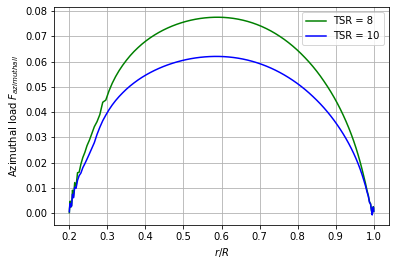

In [27]:
# Plotting the radial distribution of azimuthal load

rho = 1.225

plt.figure()
#plt.plot(L_6.blades[0].R_cent/R,L_6.blades[0].F_az/(0.5*rho*U_0**2*R), 'r', label ='TSR = 6')
plt.plot(L_8.blades[0].R_cent/R,L_8.blades[0].F_az/(0.5*rho*U_0**2*R), 'g', label ='TSR = 8')
plt.plot(L.blades[0].R_cent/R,L.blades[0].F_az/(0.5*rho*U_0**2*R), 'b', label ='TSR = 10')
plt.grid(True)
plt.xlabel('$r/R$')
plt.ylabel(r'Azimuthal load $F_{azimuthall}$')
plt.savefig('Figures_Turbine/AzimuthalLoad.eps')
plt.legend()

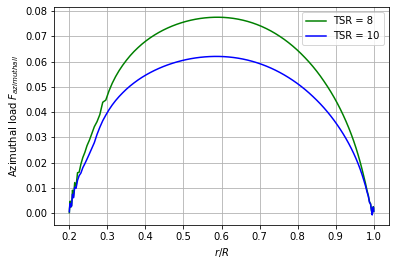

In [28]:
# Plotting the radial distribution of the thrust coefficient

rho = 1.225

plt.figure()
#plt.plot(L_6.blades[0].R_cent/R,L_6.blades[0].F_az/(0.5*rho*U_0**2*R), 'r', label ='TSR = 6')
plt.plot(L_8.blades[0].R_cent/R,L_8.blades[0].F_az/(0.5*rho*U_0**2*R), 'g', label ='TSR = 8')
plt.plot(L.blades[0].R_cent/R,L.blades[0].F_az/(0.5*rho*U_0**2*R), 'b', label ='TSR = 10')
plt.grid(True)
plt.xlabel('$r/R$')
plt.ylabel(r'Azimuthal load $F_{azimuthall}$')
plt.savefig('Figures_Turbine/ThrustCoefficient.eps')
plt.legend()

# Two rotors

In [ ]:
#turbine parameters
R = 50
N_blades = 3
mu_start = 0.2
mu_end = 1
U_0 = 10

N_blade_sec = 20       #number of blade sections
N_wake_sec_rot = 30    #number of wake sections per rotation of the rotor
N_rot = 5              #the number of rotations of the rotor NOTE needs to be integer
a_w = 0.25             #the assumed wake convection induction factor U_wake = U_0*(1-a_w)
TSR = 10          

airfoil = 'DU_polar.txt' #DU_polar.txt or ARA_polar.txt

mu_vec = np.array([0.2,1.0])   #vector where chord and twist are known. NOTE beginpoint needs to be mu_start and end point mu_end
chord_vec = np.array([3.4,1])  #chord values at above locations in m
twist_vec = np.array([9.2,-2]) #twist values at above locations in degrees

spacing = 'cosine'  #spacing method to use, choose from 'cosine' or 'uniform'

#######new part
N_rotors = 2 #max is 2 currently
phase_diff = 0 #phase difference in radians, note max phase_diff = 2*pi/N_blades
location = [0,2*R]  #y-locations of the rotors

#intialize the class for two rotor case
L1 = lifting_line_model(R, N_blades, mu_start, mu_end, mu_vec, chord_vec, twist_vec, U_0, TSR, N_blade_sec, N_wake_sec_rot, N_rot, a_w, airfoil, spacing = spacing, N_rotors = N_rotors, phase_diff = phase_diff, location=location)
#change an attribute of the class, in this case the update weight, if you're happy with standard value, this line can be skipped
L1.weight_step = 0.05
L1.print_progress = False
#commit all the inputs
L1.commit_parameters()


L1.solve_system()

print(L1.blades[0].alpha)
print(L1.blades[1].alpha)
print(L1.blades[2].alpha)

#solve the single rotor case again for TSR=10 to compare
L.TSR = 10
L.print_progress = False
L.commit_parameters()
L.solve_system()


In [ ]:
#plot the wake of the two rotor case
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 180)

colors = ['b','r','g']

#plot the wake structure
for k in range(2):
    for j in range(N_blades):
        ax.plot(L1.blades[N_blades*k+j].x_cp,L1.blades[N_blades*k+j].y_cp,L1.blades[N_blades*k+j].z_cp)
        for i in range(N_blade_sec+1):
            ax.plot(L1.blades[N_blades*k+j].x_wake[i,:],L1.blades[N_blades*k+j].y_wake[i,:],L1.blades[N_blades*k+j].z_wake[i,:], colors[j])

#compare the results of the two rotor case with the one rotor case
print('For the single rotor case CT = {} and the two rotor case CT = {}'.format(L.CT_polar,L1.CT_polar))
print('For the single rotor case CP = {} and the two rotor case CP = {}'.format(L.CP_polar,L1.CP_polar))


In [ ]:
print(mu_dist)


In [ ]:
mu_vec



In [ ]:
mu_dist

In [ ]:
L.blades[0].mu_dist

In [ ]:
L.blades[0].gamma_bound

In [ ]:
L.blades[0].gamma_bound*U_0

In [ ]:
np.pi

In [ ]:
pi

In [ ]:
TSR/R

In [ ]:
R

In [ ]:
mu_vec

In [ ]:
R_cent

In [ ]:
L.blades[0].R_cent

In [ ]:
U_0**2 *np.pi

In [ ]:
R

In [ ]:
TSR/R

In [ ]:
TSR_6/R

In [ ]:
L_8.blades[0].gamma_bound

In [ ]:
L_8.blades[0].gamma_bound/(U_0**2 *np.pi)*(2*TSR_8/R)

In [ ]:
L_8.blades[0].gamma_bound/(U_0 *np.pi)*(2*TSR_8/R)

In [ ]:
L.blades[0].Omega

In [ ]:
L.blades[0].alpha

In [ ]:
L.blades[0].omega

In [ ]:
L.blades[0].Omega

In [ ]:
np.array([0.77,3.73]) 

In [ ]:
np.array([0.2,1.0]) 